<a href="https://colab.research.google.com/github/2004ARYAN/K-Means-Clustering-on-a-Dataset/blob/main/K_Means_Clustering_on_Airplane_Crash_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv("/content/sample_data/Airplane_Crashes_and_Fatalities_Since_1908.csv")  # Replace "your_dataset.csv" with the actual file path
print(data.head())


         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN

In [5]:
selected_features = data[['Fatalities', 'Aboard']]


In [7]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the selected features
selected_features = imputer.fit_transform(selected_features)


In [9]:
n_clusters = 3  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

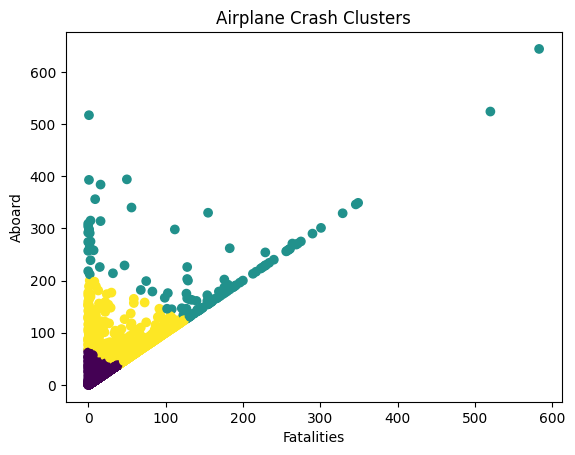

In [10]:
plt.scatter(data['Fatalities'], data['Aboard'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Fatalities')
plt.ylabel('Aboard')
plt.title('Airplane Crash Clusters')
plt.show()


In [11]:
inertia = kmeans.inertia_


In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(selected_features, kmeans.labels_)


In [13]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(selected_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.6996679600841729
